In [181]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df_track = pd.read_json('endsong_0.json')
df_track.head()

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2018-08-03T18:46:51Z,mickie_daniel,"Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)",92315,BR,177.125.173.64,unknown,Pa Parará,Jaloo,#1,...,None,None,None,trackdone,endplay,True,NaN,False,1533321914984,False
1,2018-10-10T10:52:18Z,mickie_daniel,"Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)",1068,BR,189.40.91.120,unknown,"Hindi Sad Diamonds - From ""Moulin Rouge"" Sound...",John Leguizamo,Moulin Rouge,...,None,None,None,fwdbtn,fwdbtn,True,NaN,True,1539168015164,False
2,2018-07-26T17:52:54Z,mickie_daniel,"Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)",212693,BR,170.244.197.98,unknown,Sissy That Walk,RuPaul,Born Naked,...,None,None,None,clickrow,trackdone,False,NaN,False,1532627362385,False
3,2018-07-18T18:08:38Z,mickie_daniel,"Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)",2926,BR,177.125.173.65,unknown,Perfectly Wrong,Shawn Mendes,Shawn Mendes,...,None,None,None,fwdbtn,fwdbtn,True,NaN,False,1531937315967,False
4,2019-10-13T20:10:19Z,mickie_daniel,"Android OS 9 API 28 (motorola, motorola one)",183893,BR,189.40.72.147,unknown,Fluorescent Adolescent,Arctic Monkeys,Favourite Worst Nightmare,...,None,None,None,playbtn,trackdone,True,NaN,True,1570983287565,False


In [183]:
df_track.describe()

,ms_played,skipped,offline_timestamp
count,1.585600e+04,1891.000000,1.585600e+04
mean,1.285738e+05,0.305658,1.129812e+12
std,1.627353e+05,0.460808,7.140245e+11
min,0.000000e+00,0.000000,0.000000e+00
25%,3.883750e+03,0.000000,1.671226e+09
50%,1.366445e+05,0.000000,1.541026e+12
75%,2.123105e+05,1.000000,1.625951e+12
max,6.203840e+06,1.000000,1.665768e+12


In [184]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 15856 non-null  object 
 1   username                           15856 non-null  object 
 2   platform                           15856 non-null  object 
 3   ms_played                          15856 non-null  int64  
 4   conn_country                       15856 non-null  object 
 5   ip_addr_decrypted                  15856 non-null  object 
 6   user_agent_decrypted               14412 non-null  object 
 7   master_metadata_track_name         13908 non-null  object 
 8   master_metadata_album_artist_name  13908 non-null  object 
 9   master_metadata_album_album_name   13908 non-null  object 
 10  spotify_track_uri                  13908 non-null  object 
 11  episode_name                       99 non-null     obj

In [185]:
df_track.isnull().sum()

ts                                       0
username                                 0
platform                                 0
ms_played                                0
conn_country                             0
ip_addr_decrypted                        0
user_agent_decrypted                  1444
master_metadata_track_name            1948
master_metadata_album_artist_name     1948
master_metadata_album_album_name      1948
spotify_track_uri                     1948
episode_name                         15757
episode_show_name                    15757
spotify_episode_uri                  15757
reason_start                             0
reason_end                               0
shuffle                                  0
skipped                              13965
offline                                  0
offline_timestamp                        0
incognito_mode                           0
dtype: int64

In [186]:
## é preciso preencher os null pois alguns modelos de machine learning dão erro com valores nulls
df_track.fillna(0, inplace=True)

In [187]:
df_track.isnull().sum()

ts                                   0
username                             0
platform                             0
ms_played                            0
conn_country                         0
ip_addr_decrypted                    0
user_agent_decrypted                 0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
episode_name                         0
episode_show_name                    0
spotify_episode_uri                  0
reason_start                         0
reason_end                           0
shuffle                              0
skipped                              0
offline                              0
offline_timestamp                    0
incognito_mode                       0
dtype: int64

In [188]:
##verifica quantas faixas foram no modo aleatorio
df_track.shuffle.value_counts(sort = False)

True     9240
False    6616
Name: shuffle, dtype: int64

In [189]:
df_plataform = df_track['platform'].value_counts()
print(df_plataform)

Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)                                       4665
Android OS 10 API 29 (motorola, motorola one)                                    3968
Android OS 9 API 28 (motorola, motorola one)                                     1415
Partner amazon_salmon Amazon;Echo_Dot;27d4dfe427b34d57995b463e5d63198d;;tpapi     932
android                                                                           911
Android OS 8.0.0 API 26 (motorola, Moto Z2 Play)                                  846
not_applicable                                                                    467
Android OS 6.0 API 23 (motorola, XT1068)                                          425
windows                                                                           359
Android OS 4.1.2 API 16 (samsung, GT-S5310B)                                      229
web_player windows 10;chrome 103.0.0.0;desktop                                    180
web_player windows 10;chrome 102.0.0.0;desktop        

In [190]:
df_plataform.head(5)

Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)                                       4665
Android OS 10 API 29 (motorola, motorola one)                                    3968
Android OS 9 API 28 (motorola, motorola one)                                     1415
Partner amazon_salmon Amazon;Echo_Dot;27d4dfe427b34d57995b463e5d63198d;;tpapi     932
android                                                                           911
Name: platform, dtype: int64

In [191]:
df_plataform[] = df_plataform["Android OS 7.1.2 API 25 (Xiaomi, Redmi 4X)"] + df_plataform["Android OS 10 API 29 (motorola, motorola one)"]

SyntaxError: invalid syntax (1019522640.py, line 1)

In [ ]:
x = "Android"
y = "android"
df_track_android = df_track[df_track["platform"].str.startswith(x, y)]

In [ ]:
df_track_android.info()

In [ ]:
df_track_windows = df_track[df_track["platform"].str.startswith("windows", "Windows")]
df_track_windows.info()

In [ ]:
len(df_track_windows)

In [ ]:
df_track_web = df_track[df_track["platform"].str.startswith("web_player")]
len(df_track_web)

In [ ]:
df_track_partner = df_track[df_track["platform"].str.startswith("Partner")]
len(df_track_partner)

In [ ]:
df_track_not_applicable = df_track[df_track["platform"].str.startswith("not_")]
len(df_track_not_applicable)

In [ ]:
platforms = {'Platforms': ['Not_applicable', 'Partners', 'Web_player', 'Windows', 'Android'],
             'Plays': [467, 1012, 1237, 359, 11558]}
df_platforms = pd.DataFrame.from_dict(platforms, orient='columns')
df_platforms

In [ ]:
print(df_platforms.sort_values(by=['Plays']))

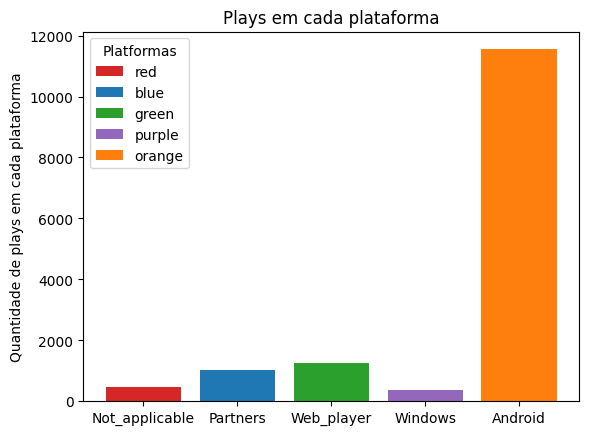

In [193]:
fig, ax = plt.subplots()

platform = ['Not_applicable', 'Partners', 'Web_player', 'Windows', 'Android']
counts = [467, 1012, 1237, 359, 11558]
bar_labels = ['red', 'blue', 'green', 'purple', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange']

ax.bar(platform, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Quantidade de plays em cada plataforma')
ax.set_title('Plays em cada plataforma')
ax.legend(title="Platformas")

plt.show()

In [ ]:
ts = df_track['ts']
ts

In [ ]:
ts = pd.to_datetime(ts)
ts

In [ ]:
hours = ts.dt.hour

In [ ]:
hours = hours.value_counts()

In [ ]:
hours.sort_values(ascending=True)
hours = hours.sort_index()
hours

<function matplotlib.pyplot.show(close=None, block=None)>

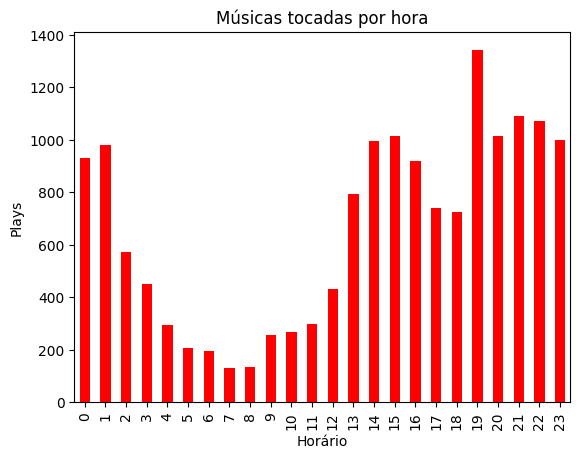

In [197]:
hours.plot(kind='bar', x='index', y='ts', color='red', title='Músicas tocadas por hora', ylabel='Plays', xlabel='Horário')
plt.show